In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df1=pd.get_dummies(df, columns=['Sex','Embarked','Pclass']).drop('Cabin', axis=1).fillna(df['Age'].mean())

In [6]:
#this is for train data
df2=df1[['Age', 'Parch','Embarked_Q', 'SibSp',
        'Embarked_C', 'Embarked_S', 'Pclass_1', 'Pclass_2','Sex_male']]

In [7]:
df2

,Age,Parch,Embarked_Q,SibSp,Embarked_C,Embarked_S,Pclass_1,Pclass_2,Sex_male
0,22.000000,0,0,1,0,1,0,0,1
1,38.000000,0,0,1,1,0,1,0,0
2,26.000000,0,0,0,0,1,0,0,0
3,35.000000,0,0,1,0,1,1,0,0
4,35.000000,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,0,0,1,0,1,1
887,19.000000,0,0,0,0,1,1,0,0
888,29.699118,2,0,1,0,1,0,0,0
889,26.000000,0,0,0,1,0,1,0,1


In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(df2)

PCA(n_components=2)

In [10]:
X = pca.transform(df2)

In [11]:
pca.components_

array([[ 9.99678234e-01, -1.11867663e-02, -2.98378205e-04,
        -1.98810783e-02,  9.70750702e-04, -9.42250877e-04,
         1.05552859e-02,  2.04572350e-04,  3.10680335e-03],
       [ 2.28296428e-02,  4.39919079e-01, -1.42073371e-02,
         8.93322049e-01, -1.97251156e-02,  3.41515213e-02,
         1.36600664e-02, -1.69444720e-02, -7.54636332e-02]])

In [12]:
var= pca.explained_variance_ratio_ #shows the variance
var

array([0.98390701, 0.0076754 ])

In [14]:
#cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([98.39, 99.16])

In [15]:
var1

array([98.39, 99.16])

In [16]:
pca.components_

array([[ 9.99678234e-01, -1.11867663e-02, -2.98378205e-04,
        -1.98810783e-02,  9.70750702e-04, -9.42250877e-04,
         1.05552859e-02,  2.04572350e-04,  3.10680335e-03],
       [ 2.28296428e-02,  4.39919079e-01, -1.42073371e-02,
         8.93322049e-01, -1.97251156e-02,  3.41515213e-02,
         1.36600664e-02, -1.69444720e-02, -7.54636332e-02]])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.plot(var1)

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [ ]:
X[:,0:1]

In [ ]:
# plot between PCA1 and PCA2 
x = X[:,0:1]
y = X[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [ ]:
from sklearn.preprocessing import scale
uni_normal = scale(df2)

In [ ]:
uni_normal

In [ ]:
finalDf = pd.concat([pd.DataFrame(X,columns=['pc1','pc2']), df[['Survived']]], axis = 1)

In [225]:
finalDf

,pc1,pc2,Survived
0,-7.703779,0.070477,0
1,8.300434,0.470998,1
2,-3.688292,-0.656063,1
3,5.299486,0.456386,1
4,5.311919,-0.526060,0
...,...,...,...
886,-2.685303,-0.725641,0
887,-10.675484,-0.802210,1
888,-0.032619,1.201547,0
889,-3.672717,-0.771743,1


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

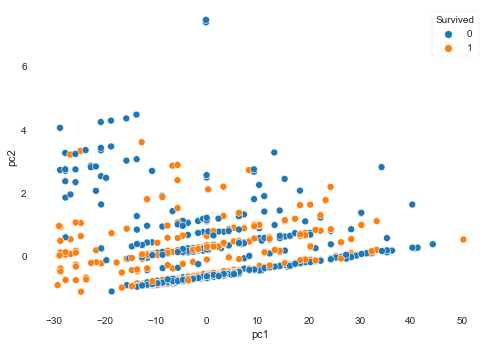

In [226]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Survived')